In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [2]:
#!/bin/bash
!kaggle datasets download salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:49<00:00, 24.1MB/s]
100% 1.06G/1.06G [00:49<00:00, 23.1MB/s]


In [3]:
import zipfile

zip_ref = zipfile.ZipFile("/content/dogs-vs-cats.zip", 'r')
zip_ref.extractall("Dog_cat")
zip_ref.close()

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten
from keras import Sequential


In [5]:
#  generators
train_ds=keras.utils.image_dataset_from_directory(
    directory="/content/Dog_cat/train",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256))
#  generators
validation_ds=keras.utils.image_dataset_from_directory(
    directory="/content/Dog_cat/test",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256))

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
#  normalization

def process(image,label):
    image=tf.cast(image/255.0,tf.float32)
    return image,label

train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)


In [7]:

# CNN model

model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation="relu",input_shape=(256,256,3)))
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding="valid"))

model.add(Conv2D(64,kernel_size=(3,3),activation="relu",input_shape=(256,256,3)))
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding="valid"))

model.add(Conv2D(128,kernel_size=(3,3),activation="relu",input_shape=(256,256,3)))
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding="valid"))

model.add(Flatten())

model.add(Dense(128,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,847,297 (56.64 MB)

 Trainable params: 14,847,297 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [10]:
history=model.fit(train_ds,validation_data=validation_ds,epochs=10)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 57s 76ms/step - accuracy: 0.6094 - loss: 0.6692 - val_accuracy: 0.7460 - val_loss: 0.5146
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 75s 78ms/step - accuracy: 0.7718 - loss: 0.4787 - val_accuracy: 0.8004 - val_loss: 0.4366
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 63s 100ms/step - accuracy: 0.8308 - loss: 0.3773 - val_accuracy: 0.8048 - val_loss: 0.4387
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 65s 74ms/step - accuracy: 0.8852 - loss: 0.2705 - val_accuracy: 0.8024 - val_loss: 0.5088
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 45s 72ms/step - accuracy: 0.9366 - loss: 0.1597 - val_accuracy: 0.7856 - val_loss: 0.7518
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 84s 75ms/step - accuracy: 0.9660 - loss: 0.0881 - val_accuracy: 0.7952 - val_loss: 0.9044
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 80s 72ms/step - accuracy: 0.9732 - loss: 0.0772 - val_accuracy: 0.7930 - val_loss: 0.9603
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 86s 78ms/step - accuracy: 0.9833 - loss: 0.0520 -

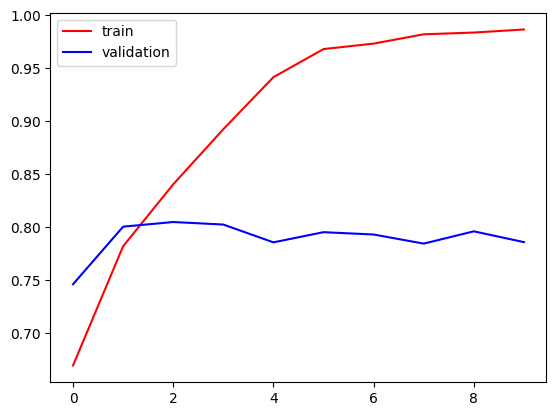

In [12]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color="red",label="train")
plt.plot(history.history['val_accuracy'],color="blue",label="validation")
plt.legend()
plt.show()

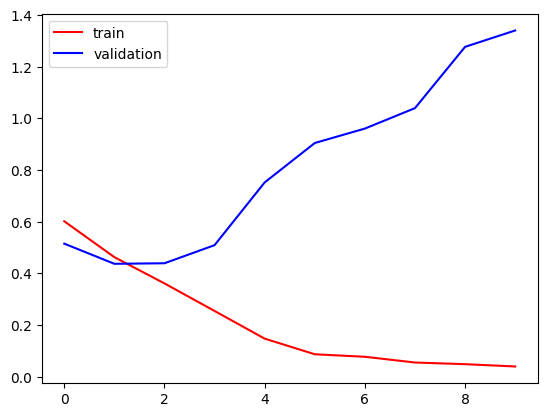

In [14]:
plt.plot(history.history['loss'],color="red",label="train")
plt.plot(history.history['val_loss'],color="blue",label="validation")
plt.legend()
plt.show()

In [16]:
import cv2

In [22]:
test_img=cv2.imread("/content/2.jpeg")

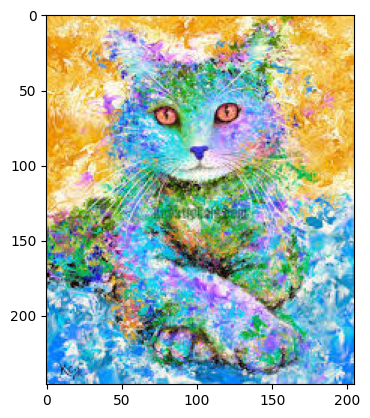

In [23]:
plt.imshow(test_img)

In [24]:
test_img.shape

(246, 205, 3)

In [25]:
test_img=cv2.resize(test_img,(256,256))
test_input=test_img.reshape((1,256,256,3))
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


array([[0.]], dtype=float32)

In [27]:
# prompt: store this model in fie

model.save('my_model.keras')